In [3]:
from sklearn.neural_network import MLPClassifier

# Use same TF-IDF + review_length features as Logistic Regression
# X and y already defined in previous pipeline

# Train-Test Split (if not already)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(128,64), activation='relu', solver='adam',
                          max_iter=20, random_state=42)

# Train model
mlp_model.fit(X_train, y_train)

# Predictions
y_pred = mlp_model.predict(X_test)
y_prob = mlp_model.predict_proba(X_test)[:,1]

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc,4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLPClassifier')
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLPClassifier")
plt.legend(loc="lower right")
plt.show()
print("ROC-AUC Score:", round(roc_auc,4))

# Save model
import joblib
joblib.dump(mlp_model, r"data/mlp_model.pkl")


NameError: name 'X' is not defined

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8458

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       600
           1       0.82      0.88      0.85       600

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200



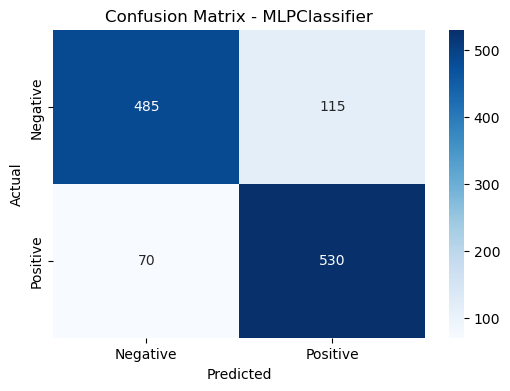

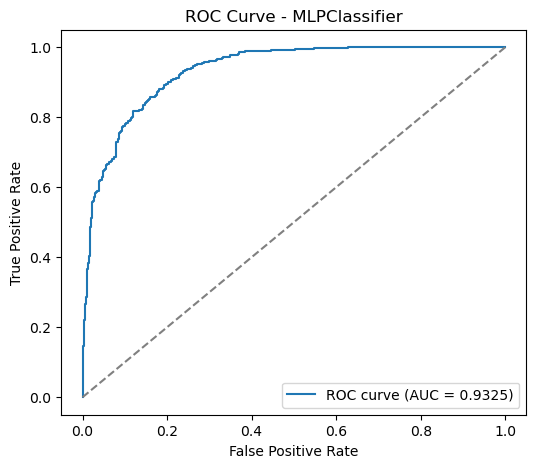

ROC-AUC Score: 0.9325

MLP model, vectorizer, and scores saved in 'data/' folder.


In [5]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib
import json

nltk.download('stopwords')
stop = set(stopwords.words('english'))

# =========================
# 2. Load & Clean Dataset
# =========================
df = pd.read_csv(r"data/IMDB_small.csv")
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Encode sentiment
df['sentiment_label'] = df['sentiment'].map({'positive':1, 'negative':0})

# Clean text
def clean_text(text):
    text = re.sub('<.*?>', '', str(text))
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    return ' '.join([w for w in text.split() if w not in stop])

df['clean_review'] = df['review'].apply(clean_text)

# Feature: review length
df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))

# =========================
# 3. Feature Engineering (TF-IDF + review length)
# =========================
vectorizer = TfidfVectorizer(max_features=2000)
X_text = vectorizer.fit_transform(df['clean_review'])
X_extra = np.array(df['review_length']).reshape(-1,1)

from scipy.sparse import hstack
X = hstack([X_text, X_extra])
y = df['sentiment_label']

# =========================
# 4. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# 5. MLP Classifier (Deep Learning)
# =========================
mlp_model = MLPClassifier(hidden_layer_sizes=(128,64), activation='relu', solver='adam',
                          max_iter=20, random_state=42)
mlp_model.fit(X_train, y_train)

# =========================
# 6. Evaluate Model
# =========================
y_pred = mlp_model.predict(X_test)
y_prob = mlp_model.predict_proba(X_test)[:,1]

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc,4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLPClassifier')
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLPClassifier")
plt.legend(loc="lower right")
plt.show()
print("ROC-AUC Score:", round(roc_auc,4))

# =========================
# 7. Save Model & Vectorizer
# =========================
joblib.dump(mlp_model, r"data/mlp_model.pkl")
joblib.dump(vectorizer, r"data/mlp_vectorizer.pkl")

# Save evaluation metrics
results = {
    "accuracy": acc,
    "roc_auc": roc_auc,
    "classification_report": classification_report(y_test, y_pred, output_dict=True),
    "confusion_matrix": cm.tolist()
}

with open(r"data/mlp_model_scores.json", "w") as f:
    json.dump(results, f, indent=4)

print("\nMLP model, vectorizer, and scores saved in 'data/' folder.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8517

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       600
           1       0.85      0.85      0.85       600

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200



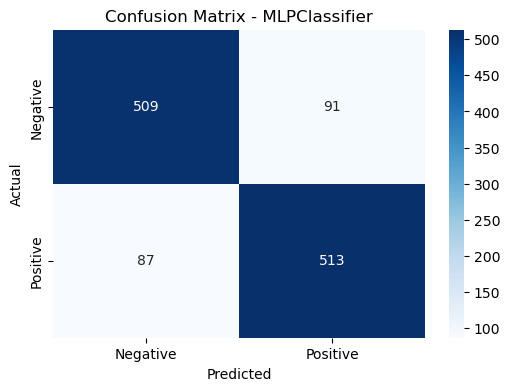

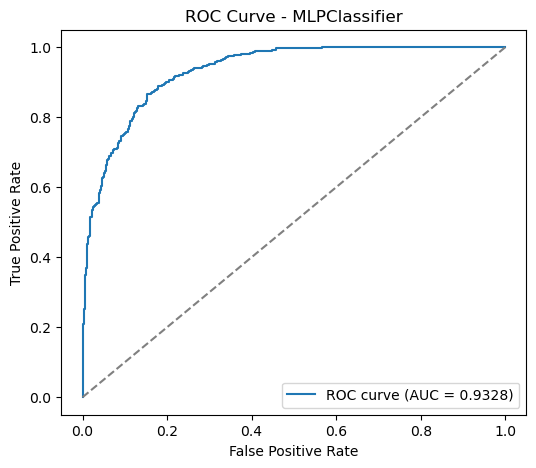

ROC-AUC Score: 0.9328

✅ MLP model, vectorizer, scaler, and scores saved in 'data/' folder.


In [7]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd                     # For handling and analyzing structured data
import numpy as np                      # For numerical operations and array manipulation
import re                               # For text cleaning using regular expressions
import matplotlib.pyplot as plt         # For data visualization (plots and charts)
import seaborn as sns                   # For enhanced data visualization (heatmaps, styling)
import nltk                             # Natural Language Toolkit for text preprocessing
from nltk.corpus import stopwords       # For removing common stop words (e.g., 'the', 'is')
from sklearn.model_selection import train_test_split  # To split dataset into train/test
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text into numeric features
from sklearn.preprocessing import StandardScaler      # To scale numerical features (important for MLP)
from sklearn.neural_network import MLPClassifier      # Multi-Layer Perceptron (a type of Neural Network)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib                         # To save and load trained models
import json                           # To save model results and metrics in JSON format

# Download NLTK stopwords (only required once)
nltk.download('stopwords')
stop = set(stopwords.words('english'))   # Define English stopword list

# =========================
# 2. Load & Clean Dataset
# =========================
df = pd.read_csv(r"data/IMDB_small.csv")  # Load IMDB dataset (CSV format)
df.drop_duplicates(inplace=True)           # Remove duplicate rows to avoid data leakage
df.dropna(inplace=True)                    # Drop rows with missing values

# Encode sentiment labels: convert text (positive/negative) to numeric (1/0)
df['sentiment_label'] = df['sentiment'].map({'positive':1, 'negative':0})

# Clean text data by removing HTML tags, punctuation, and stopwords
def clean_text(text):
    text = re.sub('<.*?>', '', str(text))              # Remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)              # Remove non-alphabetic characters
    text = text.lower()                                # Convert all text to lowercase
    # Remove stopwords to reduce noise and improve model performance
    return ' '.join([w for w in text.split() if w not in stop])

# Apply cleaning function to all reviews
df['clean_review'] = df['review'].apply(clean_text)

# Create an additional numeric feature: length of each review (in words)
df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))

# =========================
# 3. Feature Engineering (TF-IDF + review length)
# =========================
# Convert text reviews into numerical feature vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)   # Limit to 2000 most important words
X_text = vectorizer.fit_transform(df['clean_review'])

# Add review length as an additional numeric feature
X_extra = np.array(df['review_length']).reshape(-1,1)

# Scale the numeric feature (important for neural networks)
scaler = StandardScaler()
X_extra_scaled = scaler.fit_transform(X_extra)

# Combine text features (TF-IDF) with scaled numeric feature (review length)
from scipy.sparse import hstack
X = hstack([X_text, X_extra_scaled])
y = df['sentiment_label']  # Target variable

# =========================
# 4. Train-Test Split
# =========================
# Split the data into training and testing sets (80% train, 20% test)
# Stratify ensures equal proportion of positive/negative samples in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# 5. MLP Classifier (Deep Learning)
# =========================
# Initialize a Multi-Layer Perceptron neural network
# hidden_layer_sizes=(128,64): two layers, first with 128 neurons, second with 64
# activation='relu': adds non-linearity
# solver='adam': adaptive learning optimizer
# early_stopping=True: stops training when performance stops improving
# max_iter=50: number of training epochs
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128,64),
    activation='relu',
    solver='adam',
    early_stopping=True,    # Prevents overfitting
    max_iter=50,
    random_state=42
)

# Train the model using the training data
mlp_model.fit(X_train, y_train)

# =========================
# 6. Evaluate Model
# =========================
# Make predictions on test data
y_pred = mlp_model.predict(X_test)

# Get probabilities for ROC-AUC curve (probability of being positive)
y_prob = mlp_model.predict_proba(X_test)[:,1]

# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc,4))

# Detailed classification report (precision, recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLPClassifier')
plt.show()

# ROC-AUC Curve (measures model’s ability to distinguish between classes)
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0,1],[0,1],'--', color='gray')  # Reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLPClassifier")
plt.legend(loc="lower right")
plt.show()
print("ROC-AUC Score:", round(roc_auc,4))

# =========================
# 7. Save Model & Vectorizer
# =========================
# Save trained model, TF-IDF vectorizer, and scaler for reuse (deployment phase)
joblib.dump(mlp_model, r"data/mlp_model.pkl")
joblib.dump(vectorizer, r"data/mlp_vectorizer.pkl")
joblib.dump(scaler, r"data/mlp_scaler.pkl")

# Save evaluation metrics in JSON for documentation and comparison
results = {
    "accuracy": acc,
    "roc_auc": roc_auc,
    "classification_report": classification_report(y_test, y_pred, output_dict=True),
    "confusion_matrix": cm.tolist()
}

# Write results to a JSON file (easy to use for visualization later)
with open(r"data/mlp_model_scores.json", "w") as f:
    json.dump(results, f, indent=4)

print("\n✅ MLP model, vectorizer, scaler, and scores saved in 'data/' folder.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Iteration 1, loss = 0.47359237
Iteration 2, loss = 0.05350575
Iteration 3, loss = 0.00769276
Iteration 4, loss = 0.00368130
Iteration 5, loss = 0.00335240
Iteration 6, loss = 0.00322873
Iteration 7, loss = 0.00316163
Iteration 8, loss = 0.00311826
Iteration 9, loss = 0.00308714
Iteration 10, loss = 0.00306321
Iteration 11, loss = 0.00304344
Iteration 12, loss = 0.00302625
Iteration 13, loss = 0.00301080
Iteration 14, loss = 0.00299639
Iteration 15, loss = 0.00298260
Iteration 16, loss = 0.00296917
Iteration 17, loss = 0.00295591
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Improved MLPClassifier Results
Accuracy: 0.8408
ROC-AUC: 0.9228

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       600
           1       0.84      0.83      0.84       600

    accuracy                           0.84      1200
   macro avg       0.84      0.84      0.84      1200
weighted avg 

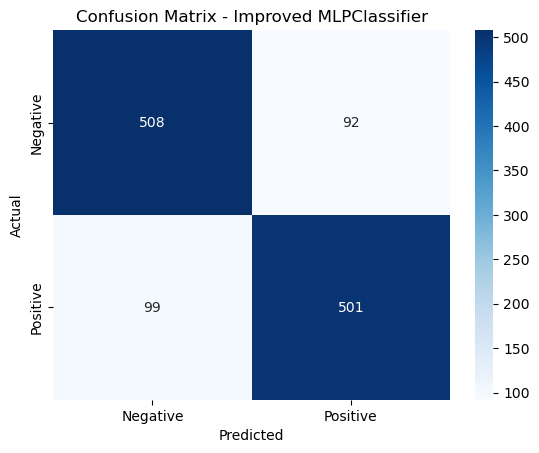

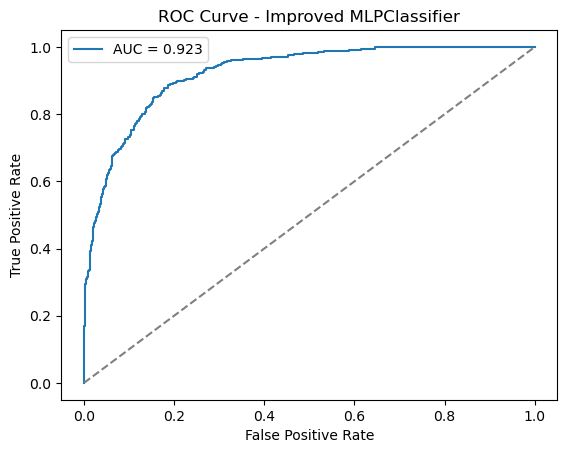


✅ Improved MLP model saved as 'data/mlp_model_improved.pkl'


In [9]:
# ============================================
# Improved Deep Learning Model: MLPClassifier
# ============================================
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

nltk.download('stopwords')
stop = set(stopwords.words('english'))

# =========================
# Load and preprocess data
# =========================
df = pd.read_csv(r"data/IMDB_small.csv")
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['sentiment_label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

def clean_text(text):
    text = re.sub('<.*?>', '', str(text))
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    return ' '.join([w for w in text.split() if w not in stop])

df['clean_review'] = df['review'].apply(clean_text)
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# TF-IDF features
vectorizer = TfidfVectorizer(max_features=3000)
X_text = vectorizer.fit_transform(df['clean_review'])

# Add numeric feature
X_extra = np.array(df['review_length']).reshape(-1, 1)

# Combine text and numeric features
X = hstack([X_text, X_extra])
y = df['sentiment_label']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize the numeric column only (MLP is sensitive to scale)
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =========================
# Baseline MLP model
# =========================
mlp_model = MLPClassifier(
    hidden_layer_sizes=(256,128,64),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    alpha=0.0005,
    batch_size=64,
    max_iter=100,
    random_state=42,
    verbose=True
)

mlp_model.fit(X_train, y_train)

# =========================
# Evaluation
# =========================
y_pred = mlp_model.predict(X_test)
y_prob = mlp_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print("\nImproved MLPClassifier Results")
print("Accuracy:", round(acc, 4))
print("ROC-AUC:", round(roc_auc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Improved MLPClassifier')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Improved MLPClassifier")
plt.legend()
plt.show()

# Save improved model
joblib.dump(mlp_model, r"data/mlp_model_improved.pkl")
print("\n✅ Improved MLP model saved as 'data/mlp_model_improved.pkl'")


In [11]:
# Save vectorizer for reuse in comparison or deployment
joblib.dump(vectorizer, r"data/vectorizer.pkl")
print("✅ TF-IDF vectorizer saved as 'data/vectorizer.pkl'")


✅ TF-IDF vectorizer saved as 'data/vectorizer.pkl'
